# Una rápida introducción al _Machine Learning_ 



## ingenieria de datos

Bueno, lo **primero** que debemos hacer antes de nada es conocer los datos y prepararlos.







## Leer datos


Para leer datos vamos a usar una librería que se llama Pandas 

[1] http://pandas.pydata.org/
    
esta librería nos permite cargar y manipular datasets de una manera MUY comoda

Vamos a probar a cargar un dataset que se encuentra en el directorio ../data/datasets/diabetes.tsv

[2] http://www4.stat.ncsu.edu/%7Eboos/var.select/diabetes.html

" age, sex, body mass index, average blood pressure, and six blood serum measurements "


In [451]:
%pylab inline
import pandas as pd

# Load the diabetes dataset
data=pd.read_csv("../data/datasets/diabetes.tsv",delimiter="\t" )

data.head()


Populating the interactive namespace from numpy and matplotlib


/usr/lib/python3.6/site-packages/IPython/core/magics/pylab.py:161: UserWarning: pylab import has clobbered these variables: ['f', 'clf']
`%matplotlib` prevents importing * from pylab and numpy
  "\n`%matplotlib` prevents importing * from pylab and numpy"


,AGE,SEX,BMI,BP,S1,S2,S3,S4,S5,S6,Y
0,59,2,32.1,101.0,157,93.2,38.0,4.0,4.8598,87,151
1,48,1,21.6,87.0,183,103.2,70.0,3.0,3.8918,69,75
2,72,2,30.5,93.0,156,93.6,41.0,4.0,4.6728,85,141
3,24,1,25.3,84.0,198,131.4,40.0,5.0,4.8903,89,206
4,50,1,23.0,101.0,192,125.4,52.0,4.0,4.2905,80,135


In [452]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 442 entries, 0 to 441
Data columns (total 11 columns):
AGE    442 non-null int64
SEX    442 non-null int64
BMI    442 non-null float64
BP     442 non-null float64
S1     442 non-null int64
S2     442 non-null float64
S3     442 non-null float64
S4     442 non-null float64
S5     442 non-null float64
S6     442 non-null int64
Y      442 non-null int64
dtypes: float64(6), int64(5)
memory usage: 38.1 KB


Bueno, pandas no solo nos ofrece la carga de los ficheros (Que por cierto se puede hacer en batch para ficheros enormes)
si no que nos ofrece la capacidad de obtener información muy valiosa:


In [453]:
data.mean(),data.max(),data.min(),data.std()

(AGE     48.518100
 SEX      1.468326
 BMI     26.375792
 BP      94.647014
 S1     189.140271
 S2     115.439140
 S3      49.788462
 S4       4.070249
 S5       4.641411
 S6      91.260181
 Y      152.133484
 dtype: float64, AGE     79.000
 SEX      2.000
 BMI     42.200
 BP     133.000
 S1     301.000
 S2     242.400
 S3      99.000
 S4       9.090
 S5       6.107
 S6     124.000
 Y      346.000
 dtype: float64, AGE    19.0000
 SEX     1.0000
 BMI    18.0000
 BP     62.0000
 S1     97.0000
 S2     41.6000
 S3     22.0000
 S4      2.0000
 S5      3.2581
 S6     58.0000
 Y      25.0000
 dtype: float64, AGE    13.109028
 SEX     0.499561
 BMI     4.418122
 BP     13.831283
 S1     34.608052
 S2     30.413081
 S3     12.934202
 S4      1.290450
 S5      0.522391
 S6     11.496335
 Y      77.093005
 dtype: float64)

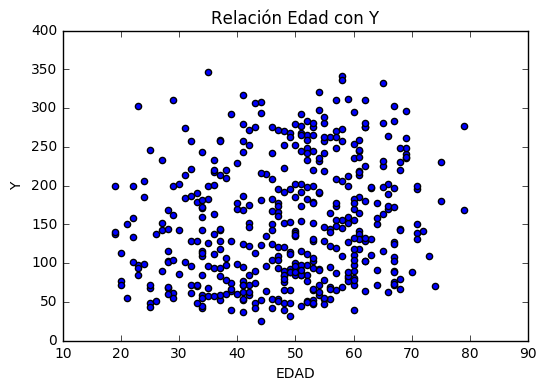

In [454]:
#tambien podemos, y debemos, pintar los datos para hacernos una idea de la distribución
ax = plt.gca()
ax.scatter(data["AGE"], data["Y"])

ax.set_xlabel('EDAD')
ax.set_ylabel('Y')
ax.set_title("Relación Edad con Y")


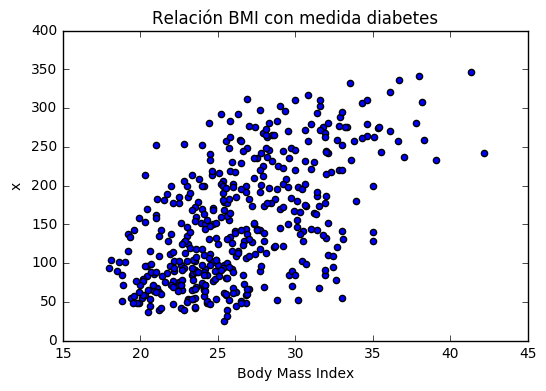

In [12]:
ax = plt.gca()
ax.scatter(data["BMI"], data["Y"])

ax.set_xlabel('Body Mass Index')
ax.set_ylabel('x')
ax.set_title("Relación BMI con medida diabetes")

Ya hemos visto que se puede cargar, sacar algunos calculos interesantes y mostrar las gráficas...

Pero hay algo que es **EXTREMADAMENTE IMPORTANTE**


Hay que normalizar (o hacer un _zero mean_ ) las variables independientes, o Xs

En la mayoría, por no decir todos, los sistemas de ML los vectores de entrada (X o features) son normalizados como practica habitual, ya sea por evitar que igualar los rangos de las features, o por ayudar en la optimización numerica, ya lo veremos con el Gradient Descent, ya que converge mucho más rápido y preciso.

Hay varias maneras de normalizar una feature, pero las más habituales son ls normalización minimo-maximo y la z-score 

minimi-maximo = (X - min(X))/(max(X)-min(X));
zscore = (X - mean(X))/std(X);



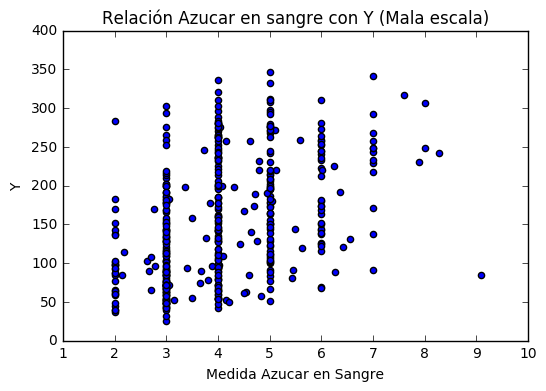

In [13]:
ax = plt.gca()
ax.scatter(data["S4"], data["Y"])

ax.set_xlabel('Medida Azucar en Sangre')
ax.set_ylabel('Y')
ax.set_title("Relación Azucar en sangre con Y (Mala escala)")

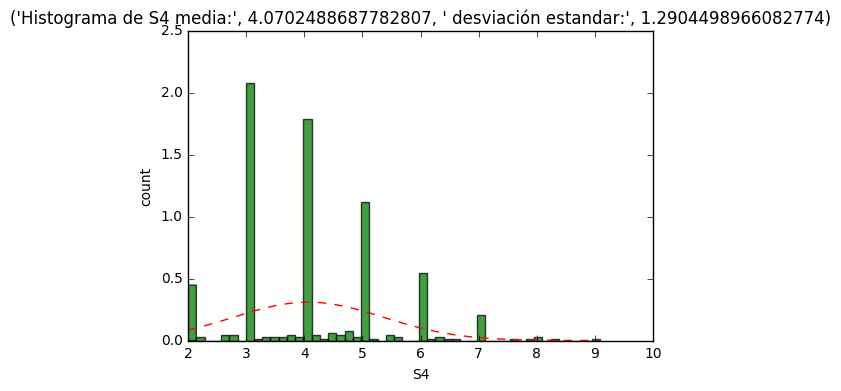

In [81]:
from matplotlib.colors import LogNorm

mu, sigma = data["S4"].mean(), data["S4"].std()
x = data["S4"]

# the histogram of the data
n, bins, patches = plt.hist(x, 50, normed=1, facecolor='green', alpha=0.75)

# add a 'best fit' line
y = mlab.normpdf( bins, mu, sigma)
l = plt.plot(bins, y, 'r--', linewidth=1)

plt.xlabel('S4')
plt.ylabel('count')
tit='Histograma de S4 media:',mu,' desviación estandar:',sigma
plt.title(tit)
plt.show()


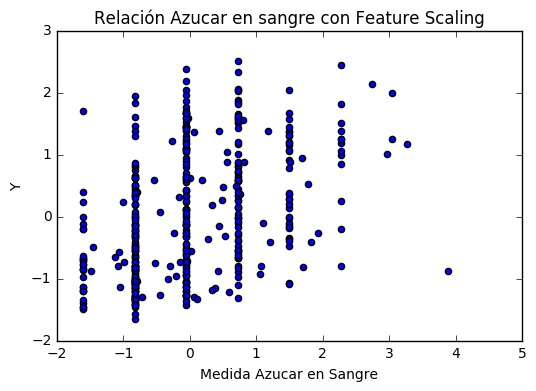

In [281]:
#vamos a usar la normalización z-score 
S = (data["S4"]-data["S4"].mean())/(data["S4"].std())
SY = (data["Y"]-data["Y"].mean())/(data["Y"].std())
ax = plt.gca()
ax.scatter(S,SY)

ax.set_xlabel('Medida Azucar en Sangre')
ax.set_ylabel('Y')
ax.set_title("Relación Azucar en sangre con Feature Scaling")

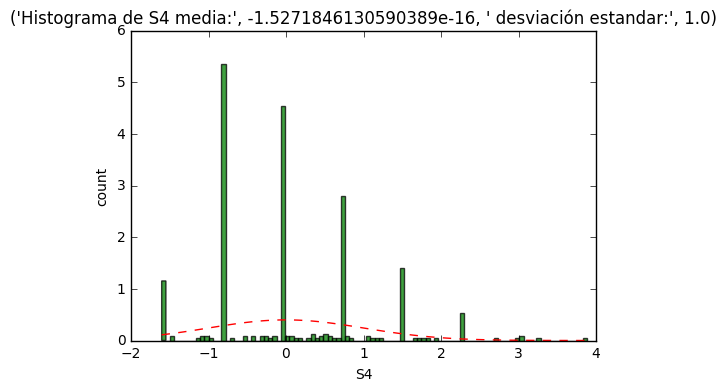

In [282]:

mu, sigma = S.mean(), S.std()
x = S

# the histogram of the data
n, bins, patches = plt.hist(x, 100, normed=1, facecolor='green', alpha=0.75)

# add a 'best fit' line
y = mlab.normpdf( bins, mu, sigma)
l = plt.plot(bins, y, 'r--', linewidth=1)

plt.xlabel('S4')
plt.ylabel('count')
tit='Histograma de S4 media:',mu,' desviación estandar:',sigma
plt.title(tit)
plt.show()


Ahora aprovechar vosotros y "plotear" algunas otras features a ver si vemos relaciones 

Bueno ahora vamos a hacer _feature scaling_ con todo el dataset.

PD: Es bueno guardarse los valores de max, min, media y desviación estandar para escalar también nuevos datos


In [470]:
#ale vamos a normalizar todos los datos ;)
data_norm = (data-data.mean())/(data.std())

Facil, ¿no?



Bueno, ahora que ya hemos acabado de preparar un poco, **muy poco** , vamos a empezar con algo de ML.


## Regresión Lineal


Ls regresión lineal es un modelo estadistico que intenta reproducir o predecir una variable "Y" a partir de su relación con las variables "X".
O dicho de otra manera:

<div style="float:block;width: 200px;margin:10px 10px 10px 0" markdown="1">
![_Formula Regresión Lineal_](../data/imgs/formulaLinearRegression.svg)_Formula Regresión Lineal_ ¡Gracias Gauss!
</div>



Pero para no asustaros, vamos a meternos en faena ya directamente.



In [471]:
def pretty_print_linear(coefs, intercept= None,names = None, sort = False):
    if names == None:
        names = ["X%s" % x for x in range(len(coefs))]
    lst = zip(coefs, names)
    if sort:
        lst = sorted(lst,  key = lambda x:-np.abs(x[0]))
    res=""
    if intercept:
        res = str(round(intercept,3))+" + "
    res=res + " + ".join("%s * %s" % (round(coef, 3), name)
                                   for coef, name in lst)
    return res

In [476]:

import matplotlib.pyplot as plt
import numpy as np
from sklearn import  linear_model
from sklearn.cross_validation import train_test_split


# cogemos solo una feature, en principio el BMI
diabetes_X = data_norm["BMI"].values.reshape((data_norm["BMI"].size,1))
diabetes_Y = data_norm["Y"]

# Partimos los datos en dos segmentos, uno para entrenar y otro para testear
#usamos la función sklearn.model_selection.train_test_split para separar aletoriamente
diabetes_X_train, diabetes_X_test, diabetes_y_train, diabetes_y_test = train_test_split(diabetes_X,
                                                                                       diabetes_Y)

# Bueno creamos el modelo de regresión lineal
regr = linear_model.LinearRegression(fit_intercept = True)

# Y lo entrenamos
regr.fit(diabetes_X_train, diabetes_y_train)

# veamos la formula que nos saca
print(pretty_print_linear( regr.coef_,regr.intercept_))
# Y el error con respecto a la realidad
print("error cuadrático: %.2f"  % np.mean((regr.predict(diabetes_X_test) - diabetes_y_test) ** 2))
# y ahora la varianza con los resultados (la precisión vamos)
print('Variance score: %.2f' % regr.score(diabetes_X_test, diabetes_y_test))



-0.028 + 0.595 * X0
error cuadrático: 0.67
Variance score: 0.34


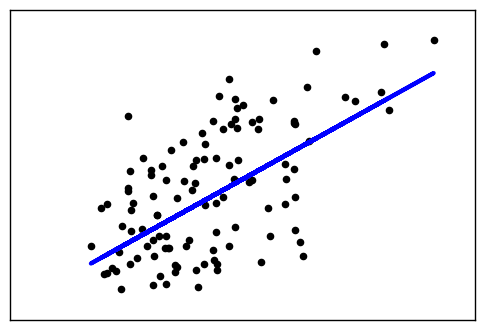

In [477]:
# vamos a dibujarlo a ver como queda
plt.scatter(diabetes_X_test, diabetes_y_test,  color='black')
plt.plot(diabetes_X_test, regr.predict(diabetes_X_test), color='blue',
         linewidth=3)

plt.xticks(())
plt.yticks(())

plt.show()

Bueno esto está muy bien, pero no es muy util, la verdad ;). 

Podemos estimar valores si están relacionados linealmente, pero nada más. 

Ademas son solo dos dimensiones, un humano no tiene problemas en verlo ¿verdad?

Pero que pasa si quiero hacer lo mismo con.... 10 dimensiones ¿?

Pues vamos a verlo con:

## Regresión lineal multivariable

A ver, parece dificil, pero ya lo hemos hecho con el código anterior, solo hay que darle más features.

In [478]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn import  linear_model
from sklearn.cross_validation import train_test_split


#Ahora cogemos todas las features que tenemos
diabetes_X = data_norm.ix[:, 0:9]
diabetes_Y = data_norm["Y"]

#la misma partición del dataset
diabetes_X_train, diabetes_X_test, diabetes_y_train, diabetes_y_test = train_test_split(diabetes_X,
                                                                                       diabetes_Y)

# el mismo modelo
regr = linear_model.LinearRegression()

# Y lo entrenamos
regr.fit(diabetes_X_train, diabetes_y_train)

# La información típica
print(pretty_print_linear( regr.coef_ ,  regr.intercept_))
print("error cuadrático: %.2f"
      % np.mean((regr.predict(diabetes_X_test) - diabetes_y_test) ** 2))
print('Variance score: %.2f' % regr.score(diabetes_X_test, diabetes_y_test))


-0.002 + -0.057 * X0 + -0.139 * X1 + 0.329 * X2 + 0.174 * X3 + -0.315 * X4 + 0.201 * X5 + -0.036 * X6 + 0.105 * X7 + 0.404 * X8
error cuadrático: 0.50
Variance score: 0.47


Pero quiero que veamos ahora una cosilla sobre el modelo:


Vemos que, primero tiene una precisión de mierda, pero lo segundo es la variabilidad en los pesos

In [480]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn import  linear_model
from sklearn.cross_validation import train_test_split


#Ahora cogemos todas las features que tenemos
diabetes_X = data_norm.ix[:, 0:9]
diabetes_Y = data_norm["Y"]


for i in range(10):
    diabetes_X_train, diabetes_X_test, diabetes_y_train, diabetes_y_test = train_test_split(diabetes_X,
                                                                                       diabetes_Y)

    regr = linear_model.LinearRegression(fit_intercept=True)
    regr.fit(diabetes_X_train, diabetes_y_train)
    
    print(pretty_print_linear(regr.coef_ ))
    print("error cuadrático: %.2f"
          % np.mean((regr.predict(diabetes_X_test) - diabetes_y_test) ** 2))
    print('Variance score: %.2f' 
          % regr.score(diabetes_X_test, diabetes_y_test))

    


-0.001 * X0 + -0.169 * X1 + 0.34 * X2 + 0.191 * X3 + -0.34 * X4 + 0.215 * X5 + 0.004 * X6 + 0.102 * X7 + 0.415 * X8
error cuadrático: 0.50
Variance score: 0.48
0.032 * X0 + -0.176 * X1 + 0.319 * X2 + 0.183 * X3 + -0.589 * X4 + 0.393 * X5 + 0.089 * X6 + 0.125 * X7 + 0.531 * X8
error cuadrático: 0.49
Variance score: 0.51
0.031 * X0 + -0.122 * X1 + 0.344 * X2 + 0.204 * X3 + -0.565 * X4 + 0.365 * X5 + 0.115 * X6 + 0.13 * X7 + 0.49 * X8
error cuadrático: 0.49
Variance score: 0.43
-0.011 * X0 + -0.11 * X1 + 0.3 * X2 + 0.258 * X3 + -0.748 * X4 + 0.48 * X5 + 0.199 * X6 + 0.215 * X7 + 0.531 * X8
error cuadrático: 0.48
Variance score: 0.44
-0.012 * X0 + -0.135 * X1 + 0.341 * X2 + 0.197 * X3 + -0.677 * X4 + 0.41 * X5 + 0.197 * X6 + 0.238 * X7 + 0.543 * X8
error cuadrático: 0.55
Variance score: 0.30
0.033 * X0 + -0.146 * X1 + 0.299 * X2 + 0.193 * X3 + -0.541 * X4 + 0.306 * X5 + 0.093 * X6 + 0.181 * X7 + 0.479 * X8
error cuadrático: 0.56
Variance score: 0.46
-0.01 * X0 + -0.176 * X1 + 0.282 * X2 + 

Para evitar que pase esto, se usa el **"Stochastic Gradient Descent"**

Así a groso modo, no es más que recorrer el "mapa" de soluciones y siguiendo el camino que nos reduce el coste:

<div style="float:block;width: 500px;margin:10px 10px 10px 0" markdown="1">
![_Formula Regresión Lineal_](../data/imgs/gradient-descent.png)_molaaa_
</div>



-0.021 + 0.6 * X0
error cuadrático: 0.73
Variance score: 0.29
-0.017 + 0.547 * X0
error cuadrático: 0.65
Variance score: 0.44
0.008 + 0.604 * X0
error cuadrático: 0.75
Variance score: 0.22
0.013 + 0.605 * X0
error cuadrático: 0.69
Variance score: 0.26
0.035 + 0.598 * X0
error cuadrático: 0.63
Variance score: 0.32
0.023 + 0.541 * X0
error cuadrático: 0.73
Variance score: 0.37
-0.016 + 0.595 * X0
error cuadrático: 0.67
Variance score: 0.28
-0.016 + 0.611 * X0
error cuadrático: 0.80
Variance score: 0.24
0.029 + 0.623 * X0
error cuadrático: 0.76
Variance score: 0.21
-0.024 + 0.58 * X0
error cuadrático: 0.71
Variance score: 0.30


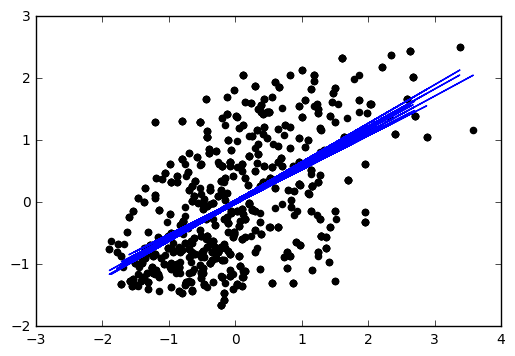

In [481]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn import  linear_model
from sklearn.cross_validation import train_test_split


# solo el BMI
diabetes_X = data_norm["BMI"].values.reshape((data_norm["BMI"].size,1))
diabetes_Y = data_norm["Y"]

plt.figure() 

for i in range(10):
        diabetes_X_train, diabetes_X_test, diabetes_y_train, diabetes_y_test = train_test_split(diabetes_X,
                                                                                       diabetes_Y)
        # Bueno creamos el modelo de regresión lineal
        regr = linear_model.LinearRegression()
        # Y lo entrenamos
        regr.fit(diabetes_X_train, diabetes_y_train)

        # The coefficients
        print(pretty_print_linear( regr.coef_,regr.intercept_))
        # The mean squared error
        print("error cuadrático: %.2f"  % np.mean((regr.predict(diabetes_X_test) - diabetes_y_test) ** 2))
        # Explained variance score: 1 is perfect prediction
        print('Variance score: %.2f' % regr.score(diabetes_X_test, diabetes_y_test))

        # Plot outputs
        plt.scatter(diabetes_X_test, diabetes_y_test,  color='black')
        plt.plot(diabetes_X_test, regr.predict(diabetes_X_test), color='blue',
                 linewidth=1)



In [483]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn import  linear_model
from sklearn.cross_validation import train_test_split
from sklearn.linear_model.stochastic_gradient import SGDRegressor

from sklearn.model_selection import cross_val_score

diabetes_X = data_norm.ix[:, 0:9]
diabetes_Y = data_norm["Y"]
# Partimos los datos en dos segmentos, uno para entrenar y otro para testear
#usamos la función sklearn.model_selection.train_test_split para separar aletoriamente



diabetes_X_train, diabetes_X_test, diabetes_y_train, diabetes_y_test = train_test_split(diabetes_X,
                                                                                   diabetes_Y,test_size=.2)
n_iter = np.ceil(10**6 / len(diabetes_X_train))
regr = linear_model.SGDRegressor(penalty='l1',
                              l1_ratio=0.00025, fit_intercept=True,n_iter=n_iter,warm_start=True,average=True)
regr.fit(diabetes_X_train, diabetes_y_train)

print(pretty_print_linear(regr.coef_))
print("error cuadrático: %.2f"
      % np.mean((regr.predict(diabetes_X_test) - diabetes_y_test) ** 2))
# Explained variance score: 1 is perfect prediction
print('Variance score: %.2f' 
      % regr.score(diabetes_X_test, diabetes_y_test))

#scores=cross_val_score(regr, diabetes_X_train, diabetes_y_train, cv=3, n_jobs=1)

0.011 * X0 + -0.17 * X1 + 0.3 * X2 + 0.173 * X3 + -0.458 * X4 + 0.311 * X5 + -0.026 * X6 + 0.074 * X7 + 0.441 * X8
error cuadrático: 0.47
Variance score: 0.48




## Regresión Logistica


Ls regresión logistica es un modelo estadistico que intenta clasificar un conjunto de datos con respecto a una etiqueta Y=0 o 1

Realemente es una regresión igual que la lineal, solo que usa una función de "activación" para decidir la clase


<div style="float:block;width: 200px;margin:10px 10px 10px 0" markdown="1">
![_Formula sigmoide_](../data/imgs/logisticfunc.svg)_función sigmoide_
</div>

<div style="float:block;width: 400px;margin:10px 10px 10px 0" markdown="1">
![_Formula sigmoide_](../data/imgs/Logistic-curve.png)_gráfica de la func. sigmoide_
</div>



In [484]:
diabetes_Y = np.where(data["Y"]>200, 1, 0)

diabetes_Y

array([0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       1, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 1, 0,
       0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1,
       1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 1,
       1, 1, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0,
       1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0,
       1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0,
       1, 0, 1, 0, 1, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0,
       0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0,
       1, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0,
       0, 1,

In [485]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn import  linear_model
from sklearn.cross_validation import train_test_split
from sklearn.linear_model.stochastic_gradient import SGDClassifier

from sklearn.model_selection import cross_val_score

diabetes_X = data_norm.ix[:, 0:9]
#según los médicos, tener el valor que llamamos Y > 200 es sintoma de diabetes, así que vamos a clasificarlo 
#como positivo(1) si es mayor de 200 y negativo(0) si es menor
diabetes_Y = np.where(data["Y"]>200, 1, 0)

diabetes_X_train, diabetes_X_test, diabetes_y_train, diabetes_y_test = train_test_split(diabetes_X,
                                                                                   diabetes_Y,test_size=.2)
n_iter = np.ceil(10**6 / len(diabetes_X_train)/2)

clf = SGDClassifier(loss="hinge", penalty="l2",n_iter=n_iter)
clf.fit(diabetes_X_train, diabetes_y_train)

print( clf.coef_)
print("error cuadrático: %.2f"
      % np.mean((clf.predict(diabetes_X_test) - diabetes_y_test) ** 2))
# Explained variance score: 1 is perfect prediction
print('Variance score: %.2f' 
      % clf.score(diabetes_X_test, diabetes_y_test))

clf.predict(diabetes_X_test)

scores=cross_val_score(clf, diabetes_X_train, diabetes_y_train, cv=3, n_jobs=1)

[[-0.1139134  -0.07581235  0.52322036  0.49152479 -1.13785065  0.48950637
   0.46203407  0.44552339  1.1546156 ]]
error cuadrático: 0.12
Variance score: 0.88


In [2]:
print(scores.mean())

NameError: name 'scores' is not defined

Y ahora a currar un poco vosotros:
    
Os voy a dejar un dataset preparado con los datos de Spam de spamassassin

https://spamassassin.apache.org/publiccorpus/


In [467]:
 def loadMailData():
    import os
    path = '../data/datasets/spam/'
    mdata=[]
    target=[]
    for filename in os.listdir(path):
        with open(path+filename,  'rb') as file:
            datas = file.read().decode('utf8', 'ignore')
            mdata.append(str(datas))
            target.append(1)

    path = '../data/datasets/ham/'
    hamTexts=[]
    for filename in os.listdir(path):
        with open(path+filename,  'rb') as file:
            datas = file.read().decode('utf8', 'ignore')
            mdata.append(str(datas))
            target.append(0)
    return mdata,target

In [468]:
maildata,mailtarget=loadMailData()

In [408]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.feature_extraction.text import CountVectorizer

count_vect = CountVectorizer()
X_train_counts = count_vect.fit_transform(maildata)
train_data_features = X_train_counts.toarray()






(2798, 92629)

In [469]:
tf_transformer = TfidfTransformer(use_idf=False).fit(X_train_counts)
Mails = tf_transformer.transform(X_train_counts)

X_Mails, cv_mails, Y_Mails, cv_y = train_test_split(X_Mails,Y_Mails,test_size=.2)

#bueno creetelo, ahora el X_mails es una matrix con la frequencia de cada palabra 
#y el Y_mails es 0 si no es spam y 1 si lo es


In [420]:
#crea dos subgrupos de datos, uno para entrenar y otro para testear

#crea un modelo de clasificacion y entrenalo
MiClasificador =...


#muestrame los resultados (Error cuadrático y el score (varianza))





[[-0.60652397  0.31605859 -0.9155821  ...,  0.          0.          0.        ]]
error cuadrático: 0.02
Variance score: 0.98
[ 0.98659966  0.98659966  0.9966443 ]


Ale vamos a comprobar que os da un buen resultado


In [422]:

# a ver si conseguimos que en estos correos que nunca ha visto el modelo nos de unos scores decentes (>85%)
scores=cross_val_score(MiClasificador, cv_mails, cv_y, cv=3, n_jobs=1)

print(scores.mean())


[ 0.97326203  0.96791444  0.96236559]


In [1]:
hard_spam="""
From nic@starflung.com  Mon Jun 24 17:06:54 2002
Return-Path: 7910726.0.27May2002215326@mp.opensrs.net
Delivery-Date: Tue May 28 02:53:28 2002
Received: from mp.opensrs.net (mp.opensrs.net [216.40.33.45]) by
    dogma.slashnull.org (8.11.6/8.11.6) with ESMTP id g4S1rSe14718 for
    <zzz@spamassassin.taint.org>; Tue, 28 May 2002 02:53:28 +0100
Received: (from popensrs@localhost) by mp.opensrs.net (8.9.3/8.9.3) id
    VAA04361; Mon, 27 May 2002 21:53:26 -0400
Message-Id: <7910726.0.27May2002215326@mp.opensrs.net>
Date: Mon, 27 May 2002 21:53:26 -0500 (EST)
From: "Starflung NIC" <nic@starflung.com>
To: <zzz@spamassassin.taint.org>
Subject: Automated 30 day renewal reminder 2002-05-27
X-Keywords: 

The following domains that are registered as belonging
to you are due to expire within the next 60 days. If
you would like to renew them, please contact
nic@starflung.com; otherwise they will be deactivated
and may be registered by another.


Domain Name, Expiry Date
nutmegclothing.com, 2002-06-26
"""
newdata=count_vect.transform([hard_spam])
X_newdata = tf_transformer.transform(newdata)
predict=clf.predict( X_newdata)
print("Valor predicho: ",predict[0], " valor real... 1")

NameError: name 'count_vect' is not defined

### Bueno, aquí acabamos la primera parte. 
### Ahora seguiremos con el segundo Notebook


